In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, TensorBoard
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_squared_error 

In [2]:
data = pd.read_csv('all_data_results_cleaned.csv')

In [3]:
to_drop=["pipe_dn","pipe_schedule","flange_class",
        "hot_spot_stress", "max_deformation", "support_right", "support_left", "ratio"]
to_keep=["outside_diameter", "wall_thickness", "raised_face_depth",
        "w_neck_c", "flange_outer_radius", "flange_thickness_d","raised_face_radius",
        "length1", "length2", "lumped_mass", "frequency", "x_deformation_position",
        "y_deformation_position", "z_deformation_position", "support", "allowable_deformation"]

data.drop(columns=to_drop,inplace=True)

In [4]:
numeric_features = ["outside_diameter", "wall_thickness", "raised_face_depth" ,'length1', 'length2', 'lumped_mass',
                    "w_neck_c", "flange_outer_radius", "flange_thickness_d","raised_face_radius"]
categorical_features = ['support']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop=None), categorical_features)
    ])

In [5]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [6]:
output_columns = ['allowable_deformation', 'frequency', 'x_deformation_position', 'y_deformation_position', 'z_deformation_position']
x = data.drop(output_columns, axis=1)
y = pd.DataFrame(data[output_columns])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [8]:
x_train_transformed = pipeline.fit_transform(x_train)
x_test_transformed = pipeline.transform(x_test)

In [9]:
scaler_y_frequency = StandardScaler()

y_train_transformed_frequency = scaler_y_frequency.fit_transform(pd.DataFrame(y_train["frequency"]))
y_test_transformed_frequency = scaler_y_frequency.transform(pd.DataFrame(y_test["frequency"]))
"""
y_train_transformed_allowable_deformation = scaler_y.fit_transform(pd.DataFrame(y_train["allowable_deformation"]))
y_test_transformed_allowable_deformation = scaler_y.transform(pd.DataFrame(y_test["allowable_deformation"]))

y_train_transformed_x_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["x_deformation_position"]))
y_test_transformed_x_displacement = scaler_y.transform(pd.DataFrame(y_test["x_deformation_position"]))

y_train_transformed_y_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["y_deformation_position"]))
y_test_transformed_y_displacement = scaler_y.transform(pd.DataFrame(y_test["y_deformation_position"]))

y_train_transformed_z_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["z_deformation_position"]))
y_test_transformed_z_displacement = scaler_y.transform(pd.DataFrame(y_test["z_deformation_position"]))
"""

'\ny_train_transformed_allowable_deformation = scaler_y.fit_transform(pd.DataFrame(y_train["allowable_deformation"]))\ny_test_transformed_allowable_deformation = scaler_y.transform(pd.DataFrame(y_test["allowable_deformation"]))\n\ny_train_transformed_x_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["x_deformation_position"]))\ny_test_transformed_x_displacement = scaler_y.transform(pd.DataFrame(y_test["x_deformation_position"]))\n\ny_train_transformed_y_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["y_deformation_position"]))\ny_test_transformed_y_displacement = scaler_y.transform(pd.DataFrame(y_test["y_deformation_position"]))\n\ny_train_transformed_z_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["z_deformation_position"]))\ny_test_transformed_z_displacement = scaler_y.transform(pd.DataFrame(y_test["z_deformation_position"]))\n'

In [10]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [11]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6008 (pid 16784), started 1 day, 21:41:03 ago. (Use '!kill 16784' to kill it.)

In [23]:
input_layer = Input(shape=(x_train_transformed.shape[1],))
hidden1 = Dense(64, activation='relu')(input_layer)
dropout1 = Dropout(0.2)(hidden1)
hidden2 = Dense(32, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(hidden2)
hidden3 = Dense(16, activation='relu')(dropout2)

# Separate output for each target variable
output_layer = Dense(1)(hidden3)
#, name='allowable_deformation'


In [24]:
model = Model(inputs=input_layer, outputs=output_layer)

In [25]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=["MSE"])

In [28]:
history = model.fit(
    x_train_transformed, 
    y_train_transformed_frequency,  # Split the targets into separate arrays
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    verbose=1,
    callbacks=[tensorboard_callback]
)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - MSE: 0.7008 - loss: 0.7008 - val_MSE: 0.2365 - val_loss: 0.2365
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MSE: 0.3053 - loss: 0.3053 - val_MSE: 0.1761 - val_loss: 0.1761
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MSE: 0.2465 - loss: 0.2465 - val_MSE: 0.1475 - val_loss: 0.1475
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 0.2037 - loss: 0.2037 - val_MSE: 0.1280 - val_loss: 0.1280
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MSE: 0.1751 - loss: 0.1751 - val_MSE: 0.1080 - val_loss: 0.1080
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MSE: 0.1775 - loss: 0.1775 - val_MSE: 0.0961 - val_loss: 0.0961
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 0.1512 - loss: 0.1512 - val_MSE: 0.0908 - val_loss: 0.0908
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 0.1357 - loss: 0.1357 - val_MSE: 0.0790 - val_loss: 0.0790
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

In [31]:
test_loss, test_mse = model.evaluate(x_test_transformed, y_test_transformed_frequency)
print('Test accuracy:', test_mse)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 0.0354 - loss: 0.0354
Test accuracy: 0.0352252721786499


In [32]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,757 (42.02 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,172 (28.02 KB)

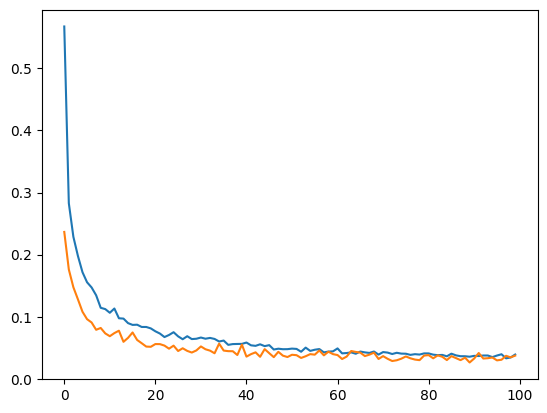

In [33]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")

In [34]:
predictions_scaled = model.predict(x_test_transformed)
predictions = scaler_y_frequency.inverse_transform((predictions_scaled))

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [35]:
predictions_df = pd.DataFrame(predictions)
print("\nSample Predictions:")
print(predictions_df.head())


Sample Predictions:
           0
0   8.261559
1  63.014469
2  12.537294
3  11.457030
4  13.397184


In [59]:
true= y_test["frequency"].tolist()
pred= predictions_df[0].tolist()
mean_squared_error(true,pred)

14.065886220651388

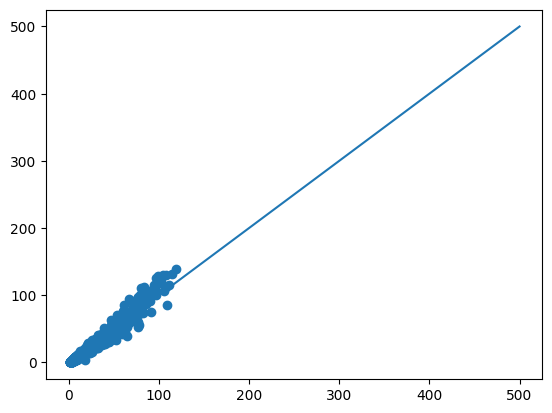

In [36]:
x=predictions_df
y=y_test["frequency"]
plt.scatter(x,y)
#plt.loglog()
plt.plot([0, 500],[0, 500])
plt.show()

(array([716., 538., 377., 220., 147.,  97.,  78.,  65.,  35.,  38.,  29.,
         28.,  17.,  22.,  19.,  10.,   6.,   6.,   6.,   3.,   7.,   7.,
          2.,   6.,   4.,   1.,   1.,   4.,   3.,   1.]),
 array([  0.5277    ,   5.13938333,   9.75106667,  14.36275   ,
         18.97443333,  23.58611667,  28.1978    ,  32.80948333,
         37.42116667,  42.03285   ,  46.64453333,  51.25621667,
         55.8679    ,  60.47958333,  65.09126667,  69.70295   ,
         74.31463333,  78.92631667,  83.538     ,  88.14968333,
         92.76136667,  97.37305   , 101.98473333, 106.59641667,
        111.2081    , 115.81978333, 120.43146667, 125.04315   ,
        129.65483333, 134.26651667, 138.8782    ]),
 <BarContainer object of 30 artists>)

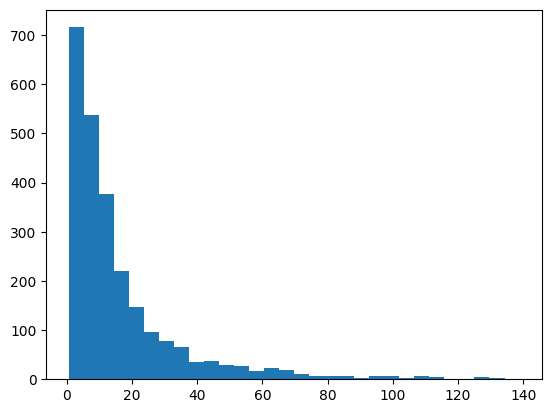

In [57]:
plt.hist(y_test["frequency"],bins=30)